In [65]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, validation_curve, learning_curve
import warnings
import time
warnings.filterwarnings('ignore')
from random import randint


In [100]:
def plotting(labels, data, rang, x, y, title, file):
    plt.figure()
    for label, arr in zip(labels, data):
        plt.plot(rang, arr, label=label)
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.savefig(file, dpi = 1200)

In [67]:
df = pd.read_csv('/Users/qingzhou/Desktop/GT_OMSCS/Machine_Learning_CS7641/assignment_1/winequality-white.csv')
df.isnull().sum()
x_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
y_output = ['quality']
class_name = ['bad', 'good']
data = df
df_x, df_y = data[x_features], data[y_output]
df_y['quality'].mask(df['quality'] <=5, 0, inplace= True)
df_y['quality'].mask(df['quality'] >=6, 1, inplace= True)
sc = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.2)
X_train, X_test = sc.fit_transform(X_train), sc.fit_transform(X_test)



In [76]:
def nn(x_train, y_train, x, y, algo, restart, schedule, size, key, itr):
    if size:
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [25, 2], algorithm = algo, activation='identity', pop_size = size, mutation_prob=0.1,
                                          max_iters=itr, learning_rate=1e-3, early_stopping = True, random_state=10, max_attempts = 1000)
        print('ga')
    elif schedule:  
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [25, 2], algorithm = algo, activation='identity', schedule= schedule,
                                          max_iters=itr, learning_rate=1e-3, early_stopping = True, random_state=10, max_attempts = 1000)
        print('sa')
    elif restart:
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [25, 2], algorithm = algo, activation='identity', restarts= restart,
                                          max_iters=itr, learning_rate=1e-3, early_stopping = True, random_state=10, max_attempts = 1000)
        print('rhc')
    
    start = time.time()
    nn_model.fit(x_train, y_train)
    model_time[key].append(time.time()-start)
    
    pred_train = nn_model.predict(x_train)
    y_acc_train = accuracy_score(y_train, pred_train)
    
    
    pred = nn_model.predict(x)
    y_acc = accuracy_score(y, pred)
    model_acc[key]['train'].append(y_acc_train)
    model_acc[key]['test'].append(y_acc)
    print(i)
    

In [77]:
# model_time = {0:[], 1:[], 2:[]}
# model_acc = {0:{'train':[], 'test':[]}, 1:{'train':[], 'test':[]}, 
#              2:{'train':[], 'test':[]}}

In [78]:
for i in range(100, 100100, 10000):
    nn(X_train, Y_train, X_test, Y_test, 'random_hill_climb', 10, None, None, 0, i)

rhc
100
rhc
10100
rhc
20100
rhc
30100
rhc
40100
rhc
50100
rhc
60100
rhc
70100
rhc
80100
rhc
90100


In [79]:
for i in range(100, 101000, 10000):
    nn(X_train, Y_train, X_test, Y_test, 'simulated_annealing', None, mlrose_hiive.ExpDecay(), None, 1, i)

sa
100
sa
10100
sa
20100
sa
30100
sa
40100
sa
50100
sa
60100
sa
70100
sa
80100
sa
90100
sa
100100


In [80]:
for i in range(100, 100100, 10000):
    nn(X_train, Y_train, X_test, Y_test, 'genetic_alg', None, None, 200, 2, i)


ga
100
ga
10100
ga
20100
ga
30100
ga
40100
ga
50100
ga
60100
ga
70100
ga
80100
ga
90100


In [88]:
def nn2(x_train, y_train, x, y, algo, restart, schedule, size, key, mut):
    if size:
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [25, 2], algorithm = algo, activation='identity', pop_size = size, mutation_prob=mut,
                                          max_iters=50000, learning_rate=1e-3, early_stopping = True, random_state=10, max_attempts = 1000)
        print('ga')
    elif schedule:  
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [25, 2], algorithm = algo, activation='identity', schedule= schedule,
                                          max_iters=50000, learning_rate=1e-3, early_stopping = True, random_state=10, max_attempts = 1000)
        print('sa')
    elif restart:
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [25, 2], algorithm = algo, activation='identity', restarts= restart,
                                          max_iters=50000, learning_rate=1e-3, early_stopping = True, random_state=10, max_attempts = 1000)
        print('rhc')
    
    start = time.time()
    nn_model.fit(x_train, y_train)
    model_time2[key].append(time.time()-start)
    
    pred_train = nn_model.predict(x_train)
    y_acc_train = accuracy_score(y_train, pred_train)
    
    
    pred = nn_model.predict(x)
    y_acc = accuracy_score(y, pred)
    model_acc2[key]['train'].append(y_acc_train)
    model_acc2[key]['test'].append(y_acc)
    print(y_acc_train, y_acc)

In [89]:
model_time2 = {0:[], 1:[], 2:[]}
model_acc2 = {0:{'train':[], 'test':[]}, 1:{'train':[], 'test':[]}, 
             2:{'train':[], 'test':[]}}

In [86]:
print(model_time, model_time2, model_acc, model_acc2)

{0: [4.14831280708313, 395.04956007003784, 739.3775091171265, 1096.2649710178375, 1456.8079311847687, 1746.622448682785, 2086.6767299175262, 2423.218097925186, 2769.3148608207703, 3141.367019891739], 1: [0.45464491844177246, 42.07423186302185, 83.8992109298706, 126.12717700004578, 167.4850287437439, 210.33256006240845, 258.9489538669586, 294.642982006073, 336.1072838306427, 378.9405460357666, 426.67784214019775], 2: [45.190402030944824, 1104.229340314865, 1105.6493921279907, 1106.7525911331177, 1108.3027567863464, 1104.0939917564392, 1106.5010268688202, 1116.1690797805786, 1101.7744958400726, 1105.2366697788239], 3: [0.8166217803955078, 7.492660999298096, 7.5563671588897705, 7.340597152709961, 7.291033029556274, 7.362045764923096, 7.191276788711548, 7.2609851360321045, 7.765334844589233, 7.775576114654541]} {0: [], 1: [], 2: [], 3: []} {0: {'train': [0.630423685553854, 0.6421643695763144, 0.6539050535987749, 0.6656457376212354, 0.6794282797345584, 0.689382337927514, 0.6975497702909648,

In [145]:
def plotting(labels, data, rang, x, y, title, file):
    plt.figure()
    for label, arr in zip(labels, data):
        plt.plot(rang, arr, label=label)
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.savefig(file, dpi = 1200)

In [159]:
model_labels = ['Random Hill Climb', 'Simulated Annealing', 'Genetic Algorithm']

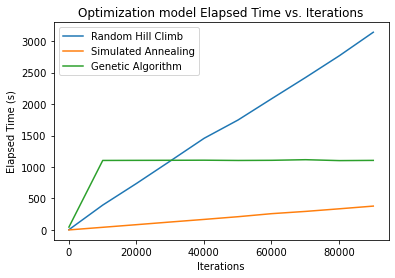

In [165]:
plotting(model_labels, [model_time[0], model_time[1], model_time[2]],np.arange(100, 100100, 10000), 
         'Iterations', 'Elapsed Time (s)', 'Optimization model Elapsed Time vs. Iterations', 'nn_time_itr.png')

In [161]:
model_labels1 = ['Validation', 'Training']

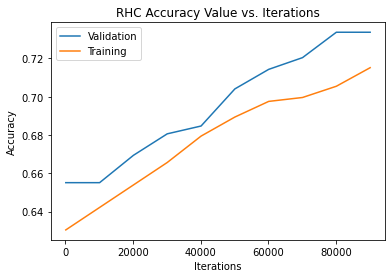

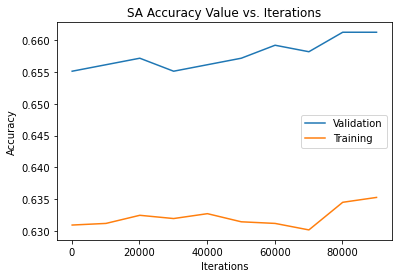

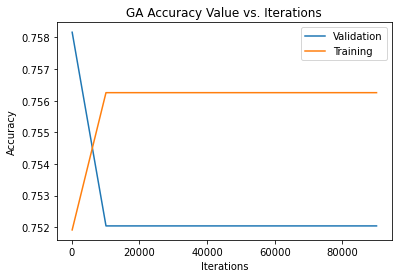

In [164]:
plotting(model_labels1, [model_acc[0]['test'], model_acc[0]['train']],np.arange(100, 100100, 10000), 
         'Iterations', 'Accuracy', 'RHC Accuracy Value vs. Iterations', 'nn_rfit_itr.png')
plotting(model_labels1, [model_acc[1]['test'], model_acc[1]['train']],np.arange(100, 100100, 10000), 
         'Iterations', 'Accuracy', 'SA Accuracy Value vs. Iterations', 'nn_sfit_itr.png')
plotting(model_labels1, [model_acc[2]['test'], model_acc[2]['train']],np.arange(100, 100100, 10000), 
         'Iterations', 'Accuracy', 'GA Accuracy Value vs. Iterations', 'nn_gfit_itr.png')

In [168]:
 model_time[2], model_acc[2]

([45.190402030944824,
  1104.229340314865,
  1105.6493921279907,
  1106.7525911331177,
  1108.3027567863464,
  1104.0939917564392,
  1106.5010268688202,
  1116.1690797805786,
  1101.7744958400726,
  1105.2366697788239],
 {'train': [0.7519142419601837,
   0.756253190403267,
   0.756253190403267,
   0.756253190403267,
   0.756253190403267,
   0.756253190403267,
   0.756253190403267,
   0.756253190403267,
   0.756253190403267,
   0.756253190403267],
  'test': [0.7581632653061224,
   0.7520408163265306,
   0.7520408163265306,
   0.7520408163265306,
   0.7520408163265306,
   0.7520408163265306,
   0.7520408163265306,
   0.7520408163265306,
   0.7520408163265306,
   0.7520408163265306]})